📂 Please upload your dataset...


Saving finaldataset.csv to finaldataset.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<ipython-input-1-a6f675c1f240>:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y, palette="coolwarm")


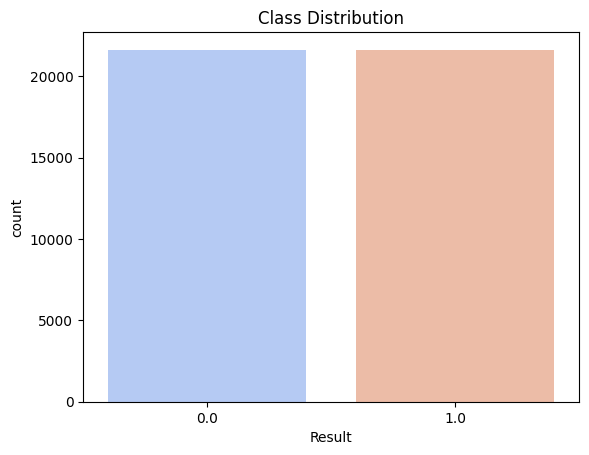

Class Distribution: Result
0.0    21639
1.0    21639
Name: count, dtype: int64
Class Imbalance Ratio: 1.0
Train Class Distribution: [0.5 0.5]
Test Class Distribution: [0.5 0.5]
Cross-Validation Accuracy: 99.63954222821636
Sgot Aspartate Aminotransferase         0.239813
Alkphos Alkaline Phosphotase            0.231259
Sgpt Alamine Aminotransferase           0.208790
Total Bilirubin                         0.174292
A/G Ratio Albumin and Globulin Ratio    0.145845
dtype: float64


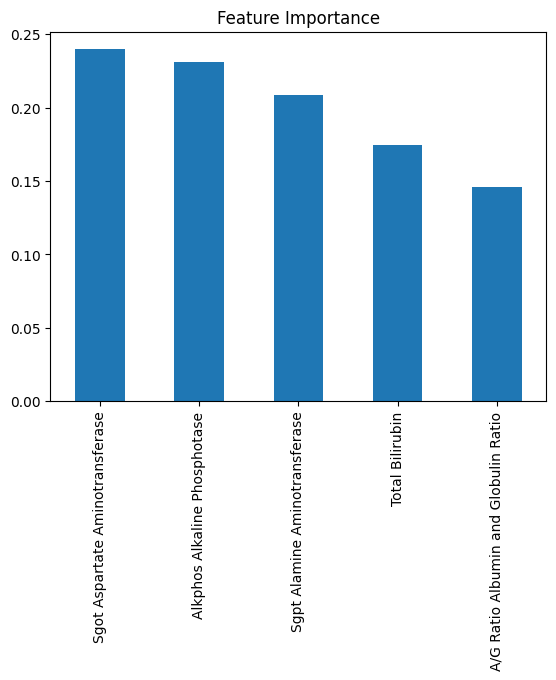

Train Accuracy: 99.99%
Test Accuracy: 99.65%
Overfitting Gap: 0.00


In [ ]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, ExtraTreesClassifier, BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, matthews_corrcoef
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_validate, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import mutual_info_classif
from google.colab import files
import io

# Step 1: Upload Dataset
print("📂 Please upload your dataset...")
uploaded = files.upload()
file_name = list(uploaded.keys())[0]
df = pd.read_csv(io.BytesIO(uploaded[file_name]), encoding="ISO-8859-1")

# Step 2: Feature Selection
target_column = "Result"
X = df.drop(columns=[target_column])
y = df[target_column]
mi_scores = mutual_info_classif(X, y)
selected_features = X.columns[mi_scores > np.median(mi_scores)]
X = X[selected_features]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Split Data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# Save Training and Testing Datasets
train_df = pd.DataFrame(X_train, columns=selected_features)
train_df["Result"] = y_train.values
test_df = pd.DataFrame(X_test, columns=selected_features)
test_df["Result"] = y_test.values
train_df.to_csv("Training_Dataset for explanation.csv", index=False)
test_df.to_csv("Testing_Dataset for explanation.csv", index=False)
files.download("Training_Dataset for explanation.csv")
files.download("Testing_Dataset for explanation.csv")

# Step 4: Check Class Imbalance
sns.countplot(x=y, palette="coolwarm")
plt.title("Class Distribution")
plt.show()
print("Class Distribution:", y.value_counts())
print("Class Imbalance Ratio:", y.value_counts().min() / y.value_counts().max())

# Step 5: Train-Test Split Validation
train_ratio = np.bincount(y_train) / len(y_train)
test_ratio = np.bincount(y_test) / len(y_test)
print("Train Class Distribution:", train_ratio)
print("Test Class Distribution:", test_ratio)

# Step 6: Cross-Validation Consistency Check
model = RandomForestClassifier()
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(model, X, y, cv=kf)
print("Cross-Validation Accuracy:", np.mean(cv_scores) * 100)

# Step 7: Feature Importance Analysis
model.fit(X_train, y_train)
importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
print(importances)
importances.plot(kind="bar", title="Feature Importance")
plt.show()

# Step 8: Overfitting Check
train_acc = model.score(X_train, y_train)
test_acc = model.score(X_test, y_test)
print(f"Train Accuracy: {train_acc * 100:.2f}%")
print(f"Test Accuracy: {test_acc * 100:.2f}%")
print(f"Overfitting Gap: {train_acc - test_acc:.2f}")
